# 1.0. Initiation: Import smPy

In [1]:
import sys

sys.path.append('../')
from smpy import *

# 1.1. Importing a PMA, Generating an mp4, and Creating an Average Frame
### 1.1i. Importing a PMA and Generating an mp4

In [2]:
file_path = "../pma files/Synthetic_hel1.pma"

In [3]:
generate_video(file_path, fps=5)

Image Size: 512 x 512
Video sucessfully generated and saved: Synthetic_hel1_Video/Synthetic_hel1.mp4
Frame Count: 431


### 1.1ii. Creating an Average Frame

Image Size: 512 x 512
Sucessfully generated average frame


Text(0.5, 1.0, 'Average Frame Image')

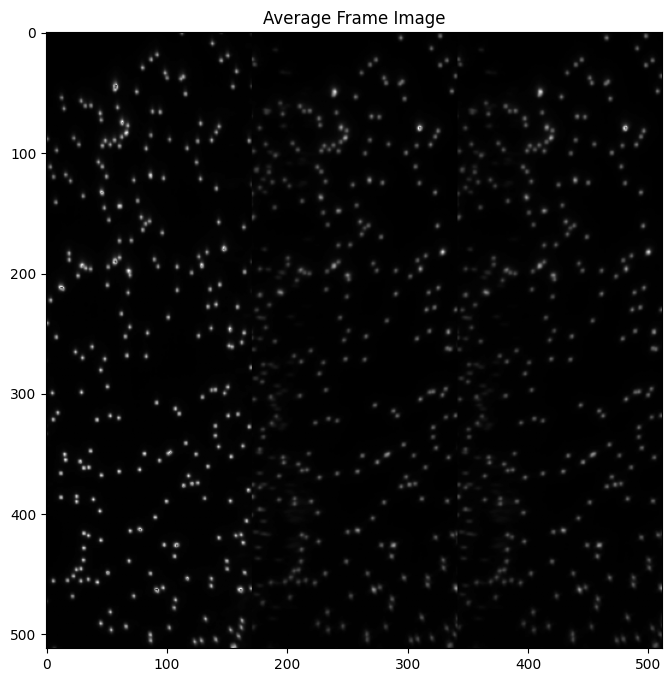

In [4]:
avg_frame_data = avg_frame_arr(file_path)
image_path = "Synthetic_hel1_Avg/Synthetic_hel1_Avg_Frame.png"
Image.fromarray(avg_frame_data).save(image_path)
image = io.imread(image_path, as_gray=True)
plt.figure(figsize=(8, 8))
plt.imshow(avg_frame_data, cmap='gray')
plt.title("Average Frame Image")

### 1.1iii. Saving Average Frames

In [5]:
CH1_img_path = "Synthetic_hel1_Avg/Synthetic_hel1_CH1_Avg_Frame.png"
CH2_img_path = "Synthetic_hel1_Avg/Synthetic_hel1_CH2_Avg_Frame.png"
CH3_img_path = "Synthetic_hel1_Avg/Synthetic_hel1_CH3_Avg_Frame.png"

CH1_data = avg_frame_data[:,:171]
CH2_data = avg_frame_data[:,171:342]
CH3_data = avg_frame_data[:,342:]

Image.fromarray(CH1_data).save(CH1_img_path)
Image.fromarray(CH2_data).save(CH2_img_path)
Image.fromarray(CH3_data).save(CH3_img_path)

image_CH1 = io.imread(CH1_img_path, as_gray=True)  
image_CH2 = io.imread(CH2_img_path, as_gray=True)
image_CH3 = io.imread(CH3_img_path, as_gray=True)

# 1.2. + 1.3.: Detecting All Bright Spots Filtering Peaks
### The find_good_peaks() function contains the find_peaks() function detaile in the review.

In [6]:
good_peaks_1_CH1, _ = find_good_peaks(CH1_img_path)
good_peaks_2_CH1, _ = find_good_peaks(CH2_img_path)
good_peaks_3_CH1, _ = find_good_peaks(CH3_img_path)


# 1.4. Mapping
### 1.4i. Linear Shift

In [7]:
shift_CH2 = [-1,-10]
shift_CH3 = [-1,-11]

tolerance=4
good_peaks_2_CH1_shift = shift_peaks(good_peaks_2_CH1, shift=shift_CH2)
good_peaks_3_CH1_shift = shift_peaks(good_peaks_3_CH1, shift=shift_CH3)


found_pairs_noshift_count_CH2, found_pairs_noshift_CH2,_= find_pairs(good_peaks_1_CH1, good_peaks_2_CH1, tolerance=tolerance, Channel_count=1)
found_pairs_shift_count_CH2, found_pairs_shift_CH2,_ = find_pairs(good_peaks_1_CH1, good_peaks_2_CH1_shift, tolerance=tolerance, Channel_count=1)

found_pairs_noshift_count_CH3, found_pairs_noshift_CH3,_= find_pairs(good_peaks_1_CH1, good_peaks_3_CH1, tolerance=tolerance, Channel_count=1)
found_pairs_shift_count_CH3, found_pairs_shift_CH3,_ = find_pairs(good_peaks_1_CH1, good_peaks_3_CH1_shift, tolerance=tolerance, Channel_count=1)

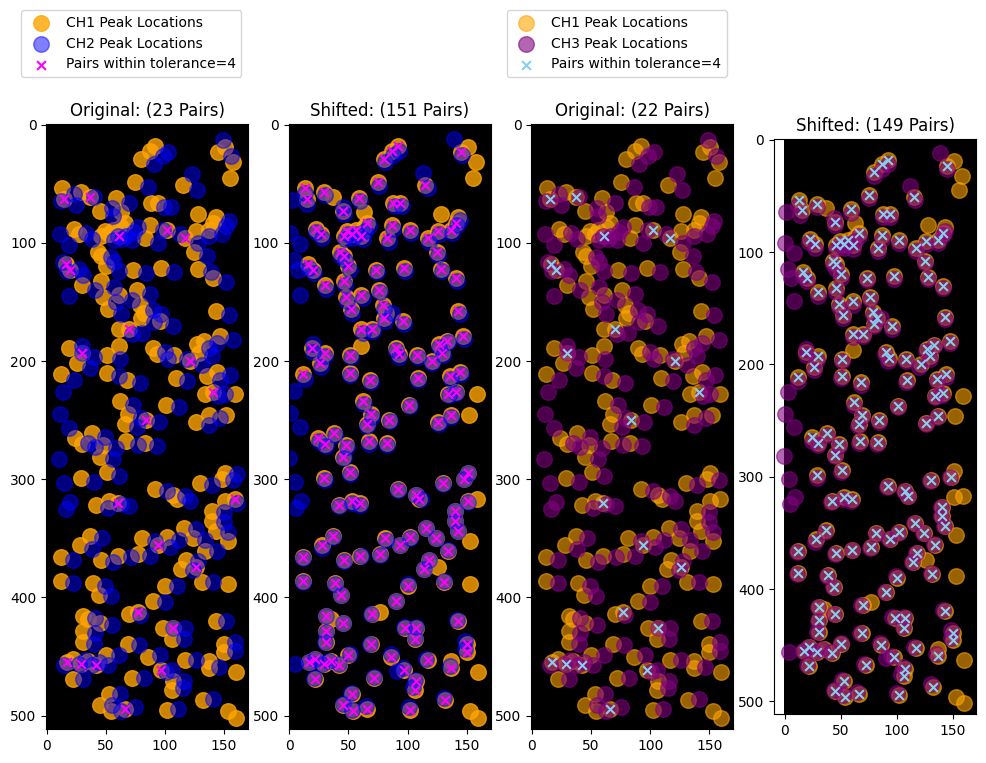

In [18]:
fig, axes = plt.subplots(1,4, figsize=(12, 16))

axes[0].imshow(np.zeros_like(CH1_data), cmap='gray')
axes[0].scatter(good_peaks_1_CH1[:, 1], good_peaks_1_CH1[:, 0], s=500, marker=".", alpha=0.8, color="orange", label='CH1 Peak Locations')
axes[0].scatter(good_peaks_2_CH1[:, 1], good_peaks_2_CH1[:, 0], s=500, marker=".", alpha=0.5, color="blue", label='CH2 Peak Locations')
axes[0].scatter(found_pairs_noshift_CH2[:, 1], found_pairs_noshift_CH2[:, 0], s=40, marker="x", color="magenta", label=f'Pairs within tolerance={tolerance}')
axes[0].set_title(f"Original: ({found_pairs_noshift_count_CH2} Pairs)")
axes[0].legend(loc='upper right', bbox_to_anchor=(1, 1.2))

axes[1].imshow(np.zeros_like(CH1_data), cmap='gray')
axes[1].scatter(good_peaks_1_CH1[:, 1], good_peaks_1_CH1[:, 0], s=500, marker=".", alpha=0.8, color="orange", label='CH1 Peak Locations')
axes[1].scatter(good_peaks_2_CH1_shift[:, 1], good_peaks_2_CH1_shift[:, 0], s=500, marker=".", alpha=0.5, color="blue", label='CH2 Peak Locations')
axes[1].scatter(found_pairs_shift_CH2[:, 1], found_pairs_shift_CH2[:, 0], s=40, marker="x", color="magenta", label=f'Pairs within tolerance={tolerance}')
axes[1].set_title(f"Shifted: ({found_pairs_shift_count_CH2} Pairs)")


axes[2].imshow(np.zeros_like(CH1_data), cmap='gray')
axes[2].scatter(good_peaks_1_CH1[:, 1], good_peaks_1_CH1[:, 0], s=500, marker=".", alpha=0.6, color="orange", label='CH1 Peak Locations')
axes[2].scatter(good_peaks_3_CH1[:, 1], good_peaks_3_CH1[:, 0], s=500, marker=".", alpha=0.6, color="purple", label='CH3 Peak Locations')
axes[2].scatter(found_pairs_noshift_CH3[:, 1], found_pairs_noshift_CH3[:, 0], s=40, marker="x", color="skyblue", label=f'Pairs within tolerance={tolerance}')
axes[2].set_title(f"Original: ({found_pairs_noshift_count_CH3} Pairs)")
axes[2].legend(loc='upper right', bbox_to_anchor=(1, 1.2))

axes[3].imshow(np.zeros_like(CH1_data), cmap='gray')
axes[3].scatter(good_peaks_1_CH1[:, 1], good_peaks_1_CH1[:, 0], s=500, marker=".", alpha=0.6, color="orange", label='CH1 Peak Locations')
axes[3].scatter(good_peaks_3_CH1_shift[:, 1], good_peaks_3_CH1_shift[:, 0], s=500, marker=".", alpha=0.6, color="purple", label='CH3 Peak Locations')
axes[3].scatter(found_pairs_shift_CH3[:, 1], found_pairs_shift_CH3[:, 0], s=40, marker="x", color="skyblue", label=f'Pairs within tolerance={tolerance}')
axes[3].set_title(f"Shifted: ({found_pairs_shift_count_CH3} Pairs)")

plt.show()


### 1.4ii. Manual Selection
This should be done by executing the Manual_Select_TwoColour.py file within the same directory as this file.

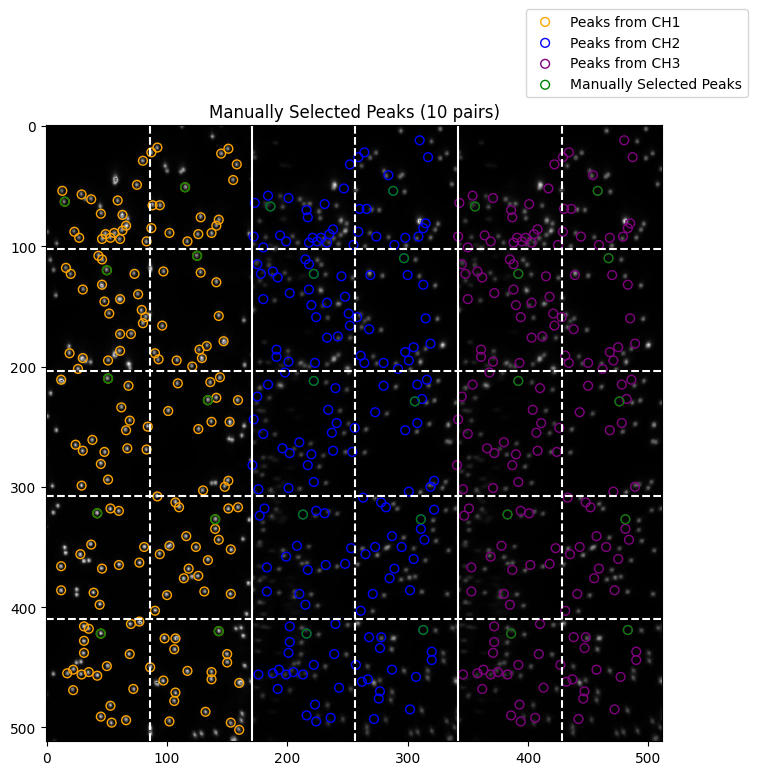

In [9]:
CH1_array = np.array([[63, 15], [51, 115], [120, 50], [108, 125], [210, 51], [228, 134], [322, 42], [327, 140], [422, 45], [420, 143]])
CH2_array = np.array([[67, 186], [54, 288], [123,222], [110, 297], [212, 222], [229, 306], [323, 213], [327,311], [422, 216], [419, 313]])
CH3_array = np.array([[67, 356], [54, 458], [123, 392], [110,467], [212, 392], [229, 476], [323, 383], [327,481], [422, 386], [419, 483]])

good_peaks_2_CH2 = shift_peaks(good_peaks_2_CH1_shift, [0, 171])
good_peaks_3_CH3 = shift_peaks(good_peaks_3_CH1_shift, [0, 342])

plt.figure(figsize=(8, 8))
plt.title("Manually Selected Peaks (10 pairs)")
plt.imshow(image, cmap="gray")

plt.axhline(y= 102, color='w', linestyle='--')  
plt.axhline(y= 204, color='w', linestyle='--')
plt.axhline(y= 308, color='w', linestyle='--')
plt.axhline(y= 410, color='w', linestyle='--')

plt.axvline(x= 86, color='w', linestyle='--')
plt.axvline(x= 256, color='w', linestyle='--')
plt.axvline(x= 428, color='w', linestyle='--')

plt.axvline(x= 171, color='w', linestyle='-')
plt.axvline(x= 342, color='w', linestyle='-')

plt.scatter(good_peaks_1_CH1[:, 1], good_peaks_1_CH1[:, 0], s=40, facecolors='none', edgecolors='orange', label='Peaks from CH1')
plt.scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=40, facecolors='none', edgecolors='b', label='Peaks from CH2')
plt.scatter(good_peaks_3_CH3 [:, 1], good_peaks_3_CH3 [:, 0], s=40, facecolors='none', edgecolors='purple', label='Peaks from CH3')
plt.scatter(CH1_array[:, 1], CH1_array[:, 0], s=40, facecolors='none', edgecolors='g', label='Manually Selected Peaks')
plt.scatter(CH2_array[:, 1], CH2_array[:, 0], s=40, facecolors='none', edgecolors='g')
plt.scatter(CH3_array[:, 1], CH3_array[:, 0], s=40, facecolors='none', edgecolors='g')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.2))

plt.show()

### 1.4iii. Polynomial Mapping

In [10]:
params_x_CH12, params_y_CH12 = find_polyfit_params(CH1_array, CH2_array, degree=3)
params_x_CH23, params_y_CH23 = find_polyfit_params(CH1_array, CH3_array, degree=3)

print("X-Mapping Parameters (CH1->CH2):", params_x_CH12)
print("Y-Mapping Parameters (CH1->CH2):", params_y_CH12)
print("X-Mapping Parameters (CH1->CH3):", params_x_CH23)
print("Y-Mapping Parameters (CH1->CH3):", params_y_CH23)

mapped_CH2 = apply_polyfit_params(good_peaks_1_CH1, params_x_CH12, params_y_CH12).astype(np.uint16)
mapped_CH3 = apply_polyfit_params(good_peaks_1_CH1, params_x_CH23, params_y_CH23).astype(np.uint16)

count_trip, trip_CH1, trip_CH2, trip_CH3 = find_trip(good_peaks_1_CH1, mapped_CH2, mapped_CH3, tolerance=4, shift_CH2=shift_CH2, shift_CH3=shift_CH3)
print("Number of Triplets Found:", count_trip)

X-Mapping Parameters (CH1->CH2): [-1.10197598e-05  2.12396105e-03  9.10756267e-01  1.71886973e+02]
Y-Mapping Parameters (CH1->CH2): [-1.48848316e-08  1.46924491e-05  9.85424900e-01  4.15094590e+00]
X-Mapping Parameters (CH1->CH3): [-1.10197598e-05  2.12396105e-03  9.10756267e-01  3.41886973e+02]
Y-Mapping Parameters (CH1->CH3): [-1.48848316e-08  1.46924491e-05  9.85424900e-01  4.15094590e+00]
Number of Triplets Found: 166


### 1.4.iv. Displaying All Found Pairs (From Polynomial Mapping)

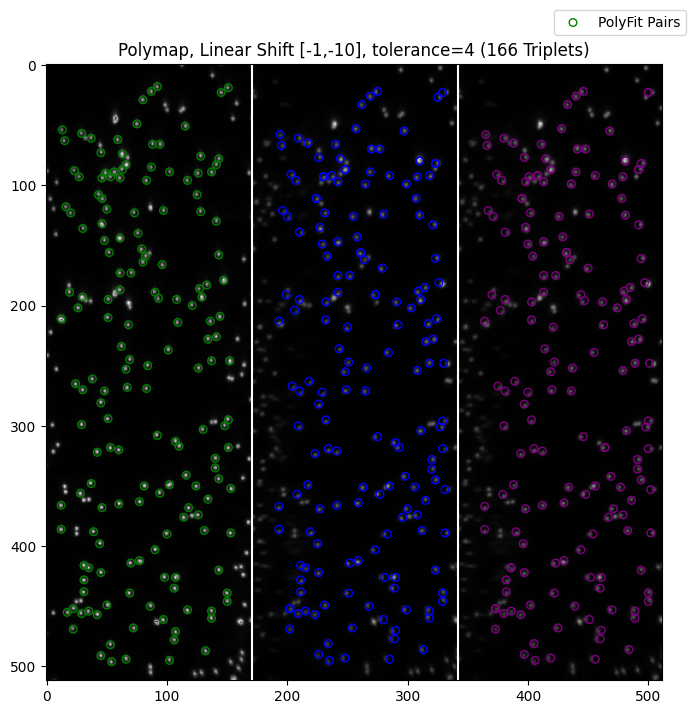

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(image, cmap="gray")
plt.title(f"Polymap, Linear Shift [-1,-10], tolerance=4 ({count_trip} Triplets)")
plt.scatter(trip_CH1[:, 1], trip_CH1[:, 0], s=30, facecolors='none', edgecolors='g', label='PolyFit Pairs')
plt.scatter(trip_CH2[:, 1], trip_CH2[:, 0], s=30, facecolors='none', edgecolors='b')
plt.scatter(trip_CH3[:, 1], trip_CH3[:, 0], s=30, facecolors='none', edgecolors='purple')
plt.axvline(x=171, color="w", linestyle='-', linewidth=1.5)
plt.axvline(x=342, color="w", linestyle='-', linewidth=1.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.1))

plt.show()

# 1.5. Displaying Time-Series

Image Size: 512 x 512


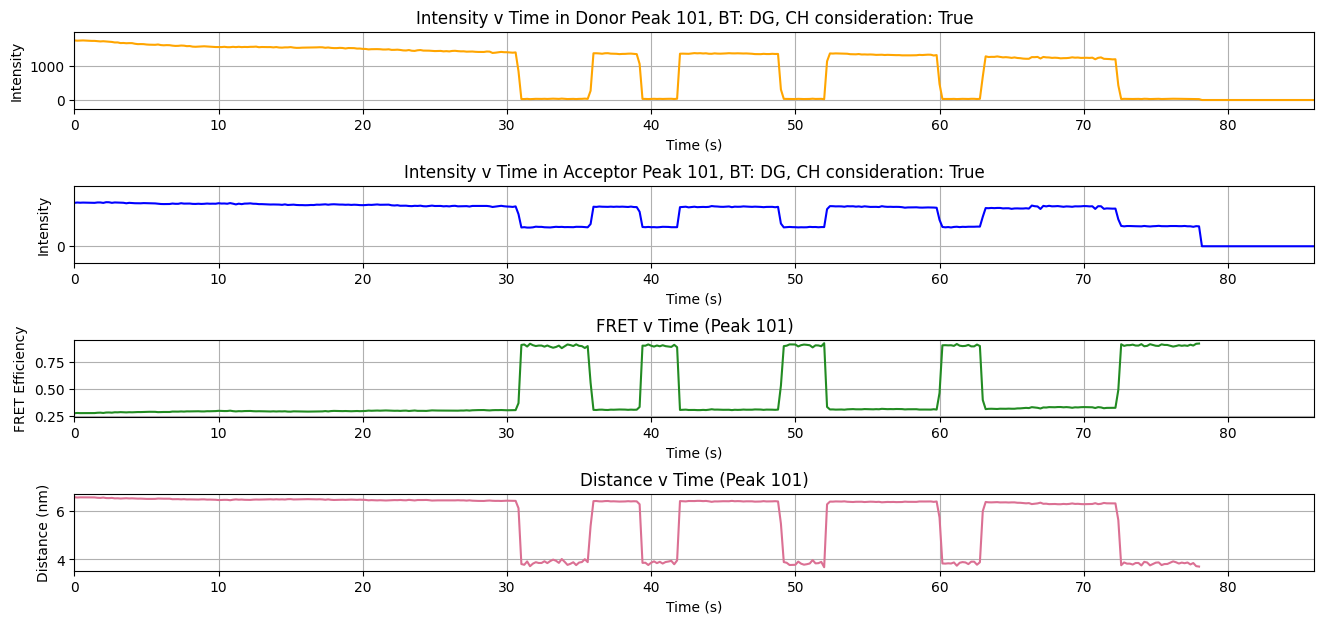

In [15]:
display_time_series(file_path, image, 72, trip_CH1, trip_CH2, tpf=1/5, R_0=5.6, radius=4, time_interval=10, background_treatment="DG", CH_consideration=True, CH1_intensity_interval=1000, CH2_intensity_interval=1000, figsize=(16,7))

Image Size: 512 x 512


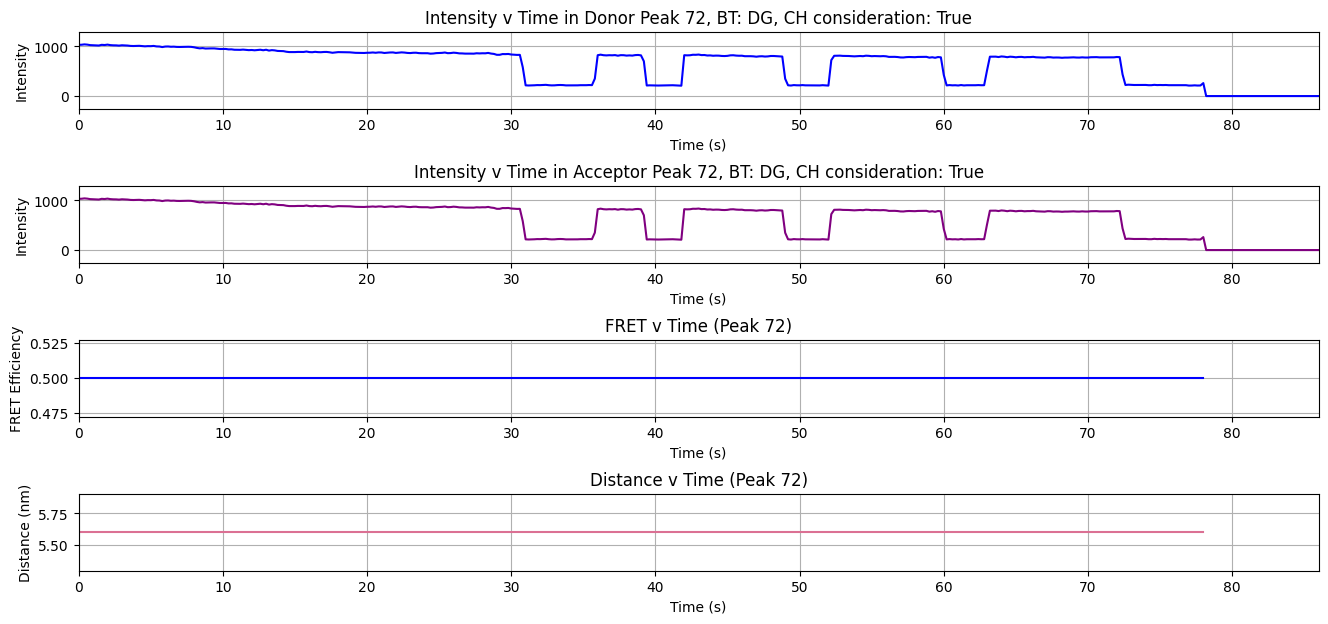

In [16]:
display_time_series(file_path, image, 72, trip_CH2, trip_CH3, tpf=1/5, R_0=5.6, radius=4, time_interval=10, background_treatment="DG", CH_consideration=True, CH1_intensity_interval=1000, CH2_intensity_interval=1000, figsize=(16,7), CH1_colour="b", CH2_colour="purple", FRET_colour="b")